In [109]:
%pylab inline
import pylab as p
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


In [111]:
#Prey Predator Modelling
#Prey = u , Predator = v
#Rate of formation of prey = du/dt = a*u - b*u*v
#Rate of formation of predator = dv/dt = -c*v + d*b*u*v
#Steady state is when du/dt = 0 and dv/dt = 0 so u(t) and v(t) vs t become constant w.r.t to time
#Hence, du/dt = 0 implies a/b = v or 0 = v
#Hence, dv/dt = 0 implies c/(d*b) = u or 0 = u
#Hence steady states are present at (0,0) and (a/b , c/(d*b))
a = 1.0
b = 0.1
c = 1.5
d = 0.75

In [112]:
#First we write code to return du/dt and dv/dt for a given X = (u,v)
def dx_dt(X , t=0):
    du_dt = a*X[0] - b*X[0]*X[1]
    dv_dt = -c*X[1] + d*b*X[0]*X[1]
    return array([du_dt  , dv_dt])


In [113]:
#Lets try printing the rates at steady states
steady1 = dx_dt([0,0])
print(steady1)
steady2 = dx_dt([c/(d*b) , a/b])
print(steady2)

[0. 0.]
[0. 0.]


In [114]:
#We now define a Jacobian Matrix
#Let us say , a function F(A,B) is dependent on parameters u,v.
#Then the Jacobian is a square matrix with partial differentiaiton of A,B with u,v.
def jacobian(X, t=0):
    A = a - b*X[1]
    B = -b*X[0]
    C = d*b*X[1]
    D = -c + d*b*X[0]
    return array([[A , B],[C,D]])

In [115]:
jacobian2 = jacobian([c/(d*b) , a/b])
print(jacobian2)

[[ 0.   -2.  ]
 [ 0.75  0.  ]]


In [116]:
#Print the eigenvalues of these vectors
eigen1, eigen2 = linalg.eigvals(jacobian2)
print(eigen1)
print(eigen2)

1.224744871391589j
-1.224744871391589j


In [117]:
t = np.linspace(0,15,1000)
x0 = ([10,5]) #Lets say initally prey = 10 and predator = 5
X = integrate.odeint(dx_dt , x0, t)

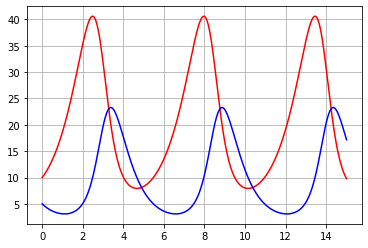

In [118]:
prey , predator = X.T
f = plt.figure()
plt.plot(t,prey, 'r-' , label='prey')
plt.plot(t,predator, 'b-', label='predator')
plt.grid()

In [119]:
def pp(x0):
    t = np.linspace(0,15,1000)
    X = integrate.odeint(dx_dt, x0, t)
    prey,predator = X.T
    return prey,predator

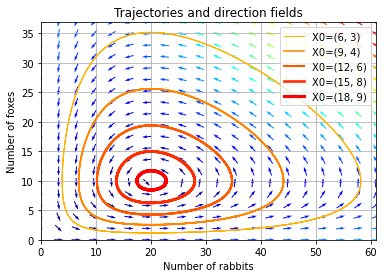

In [128]:
X_f1 = array([ c/(d*b), a/b])
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                              # starting point
    X = integrate.odeint( dx_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dx_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('rabbits_and_foxes_2.png')